# Facility Location demo
File Name: facility_location_demo.ipynb

Outline:
1. Data
2. Model
3. Analysis

Input: data_preparation.py, data_visualization.py, data files
Output: Network diagram

Developer: M. Alam & T. Das
Date: March 2023


# Data
Two dataset is considered in this project:
1. Geolocation and population density of 3887 cities in mainland USA
2. A shapefile that contains geospatial properties of cities

In [1]:
# import custom functions related to our model
import model1, model2
import data_preparation, data_visualization
# import libraries
import pandas as pd
import geopandas
from geopy import distance

import numpy as np

## Data Collection and Cleaning
Assumption: It is assumed that demand is directly proportional to population density. Let's explore city-wise density

In [2]:
data_demand = pd.read_excel("Data/Major city data.xlsx")
# geo_data = ...

In [3]:
# Show the data map (input of the model)
data_demand = data_demand[['NAME', 'ST', 'POPULATION', 'longitude', 'latitude']]
data_demand.head()

,NAME,ST,POPULATION,longitude,latitude
0,Ammon,ID,15181,-111.954,43.4758
1,Blackfoot,ID,11946,-112.346,43.1939
2,Boise City,ID,225405,-116.230,43.5990
3,Burley,ID,10727,-113.793,42.5367
4,Caldwell,ID,53942,-116.686,43.6616


In [4]:
facility, customer_df = data_preparation.data_prep(data_demand)
facility0 = facility.copy()
customer_df0 = customer_df.copy()
facility_coord = facility['facility_coord']
customer_coord = customer_df['customer_coord']

C:\Users\tanmo\OneDrive - Dalhousie University\Data Science portfolio 2023\Location allocation project\facility-location\data_preparation.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  facility.drop("index", axis=1, inplace=True)


In [5]:
customer_coord

0       43.4758,-111.954
1       43.1939,-112.346
2         43.599,-116.23
3       42.5367,-113.793
4       43.6616,-116.686
              ...       
3844    38.9699,-77.3867
3845    37.5517,-77.3285
3846    37.3434,-79.9535
3847    37.2904,-77.2984
3848    38.7914,-77.0741
Name: customer_coord, Length: 3849, dtype: object

In [6]:
facility_show = facility[['warehouse_id', 'NAME', 'ST', 'POPULATION','geometry']]
facility_show.columns = ['ID', 'Name', 'State', 'Population', 'Geometry']
display(facility_show.style.hide(axis='index'))
facility_show.to_csv('Outputs/facility_show.csv', index=False)

ID,Name,State,Population,Geometry
Warehouse 1,Chicago,IL,2781116,POINT (-87.6471 41.7565)
Warehouse 2,San Francisco,CA,871042,POINT (-122.442 37.7669)
Warehouse 3,Atlanta,GA,464043,POINT (-84.3949 33.7486)
Warehouse 4,New York,NY,8691599,POINT (-74.0101 40.7106)
Warehouse 5,Dallas,TX,1323651,POINT (-96.7958 32.7786)


In [7]:
facility

,NAME,ST,POPULATION,longitude,latitude,geometry,facility_coord,warehouse_id
0,Chicago,IL,2781116,-87.6471,41.7565,POINT (-87.64710 41.75650),"41.7565,-87.6471",Warehouse 1
1,San Francisco,CA,871042,-122.4420,37.7669,POINT (-122.44200 37.76690),"37.7669,-122.442",Warehouse 2
2,Atlanta,GA,464043,-84.3949,33.7486,POINT (-84.39490 33.74860),"33.7486,-84.3949",Warehouse 3
3,New York,NY,8691599,-74.0101,40.7106,POINT (-74.01010 40.71060),"40.7106,-74.0101",Warehouse 4
4,Dallas,TX,1323651,-96.7958,32.7786,POINT (-96.79580 32.77860),"32.7786,-96.7958",Warehouse 5


## Mainland USA and its demands
For simplicity, only mainland US is considered. 

### Plot customer and warehouse

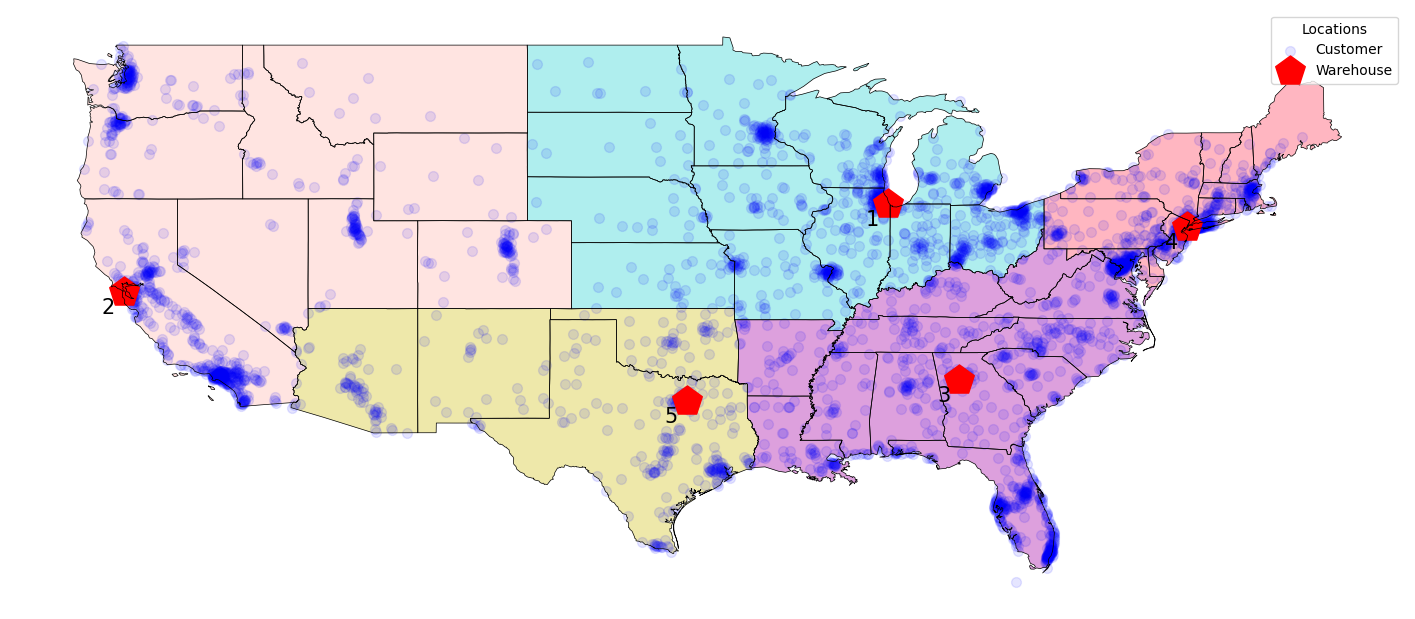

In [8]:
# Load geometric file for map
AllSt = geopandas.read_file("Data/States_shapefile/States_shapefile.shp")
# remove 2 states from map
indexNames = AllSt[AllSt['State_Code'].isin(['AK', 'HI'])].index
AllSt.drop(indexNames, inplace=True)

# draw geomap
data_visualization.draw_initial_customer_demand(AllSt, facility, customer_df) 

## Input Parameters of the model

In [9]:
# Input parameters
I = [i for i in range(0, 3849)] # need to replace this hard-coded value ++
J = [j for j in range(0, 5)]  # ++


p = round(customer_df['POPULATION'])

A = [(i,j) for i in I for j in J]                                   # Arc between pharma and census
d_ij = {(i,j): distance.geodesic(customer_coord[i], facility_coord[j]).miles for i, j in A }  # Distance between pharma and census

# we want to choose 4 from 5 warehouse
N = 4

# Modeling

## Model 1

In [10]:
# Show the model equation
z_1s, x_1s, customer_df, facility_df, assignment, attrfile, decision_df, assignment_name \
    = model1.solve(I, J, p, d_ij, N, facility, customer_df)

Set parameter Username
Academic license - for non-commercial use only - expires 2023-12-04
Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (win64)

CPU model: Intel(R) Core(TM) i5-8265U CPU @ 1.60GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 23095 rows, 19250 columns and 57740 nonzeros
Model fingerprint: 0x63bae285
Variable types: 0 continuous, 19250 integer (19250 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [5e+03, 9e+06]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 4e+00]
Found heuristic solution: objective 1.927291e+08
Presolve time: 0.19s
Presolved: 23095 rows, 19250 columns, 57740 nonzeros
Variable types: 0 continuous, 19250 integer (19250 binary)
Found heuristic solution: objective 1.943628e+08

Root relaxation: objective 1.946287e+08, 2123 iterations, 0.62 seconds (0.89 work units)

    Nodes    |    Current Node    |     Objective B

In [11]:
display(assignment_name)

,customer no.,facility no.,Assignments
0,0,1,1.0
1,1,1,1.0
2,2,1,1.0
3,3,1,1.0
4,4,1,1.0
...,...,...,...
3844,3844,3,1.0
3845,3845,3,1.0
3846,3846,2,1.0
3847,3847,3,1.0


In [12]:
print('Assignment')
display(assignment)

Assignment


,customer no.,facility no.,f_longitude,f_latitude,c_longitude,c_latitude
0,0,1,-122.4420,37.7669,-111.9540,43.4758
1,1,1,-122.4420,37.7669,-112.3460,43.1939
2,2,1,-122.4420,37.7669,-116.2300,43.5990
3,3,1,-122.4420,37.7669,-113.7930,42.5367
4,4,1,-122.4420,37.7669,-116.6860,43.6616
...,...,...,...,...,...,...
3844,3843,3,-74.0101,40.7106,-78.8735,38.4362
3845,3844,3,-74.0101,40.7106,-77.3867,38.9699
3846,3845,3,-74.0101,40.7106,-77.3285,37.5517
3847,3847,3,-74.0101,40.7106,-77.2984,37.2904


In [13]:
assignment[-100:-20]

,customer no.,facility no.,f_longitude,f_latitude,c_longitude,c_latitude
3749,3408,3,-74.0101,40.7106,-74.6593,40.9541
3750,3409,3,-74.0101,40.7106,-74.3171,40.5701
3751,3410,3,-74.0101,40.7106,-74.0689,40.7189
3752,3411,3,-74.0101,40.7106,-74.1218,40.7547
3753,3412,3,-74.0101,40.7106,-74.3863,40.9847
...,...,...,...,...,...,...
3824,3822,3,-74.0101,40.7106,-77.3969,37.2617
3825,3823,3,-74.0101,40.7106,-77.4124,39.0516
3826,3824,3,-74.0101,40.7106,-78.0002,38.4705
3827,3825,3,-74.0101,40.7106,-77.3477,38.6530


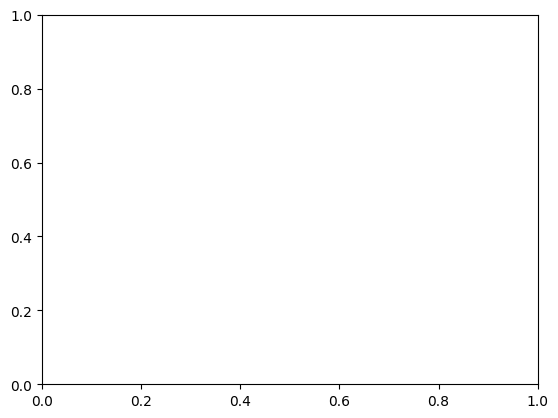

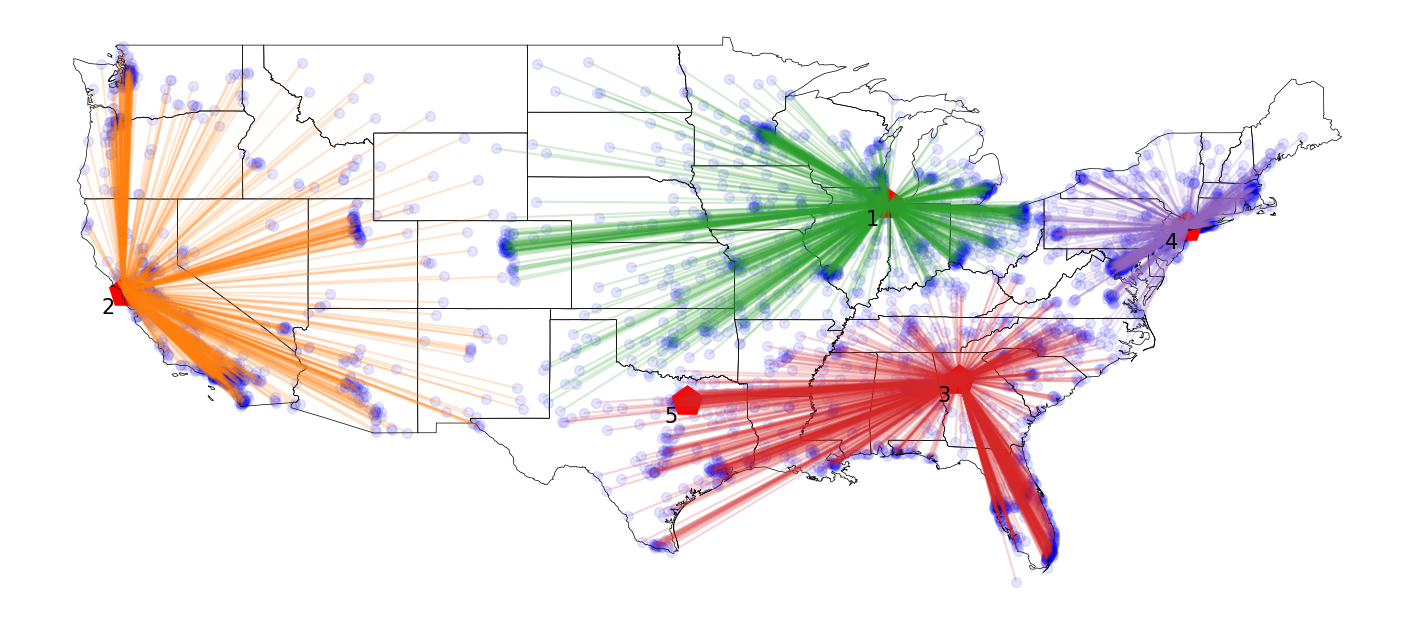

In [14]:
data_visualization.draw_network_diagram(assignment, AllSt, facility0, customer_df0)

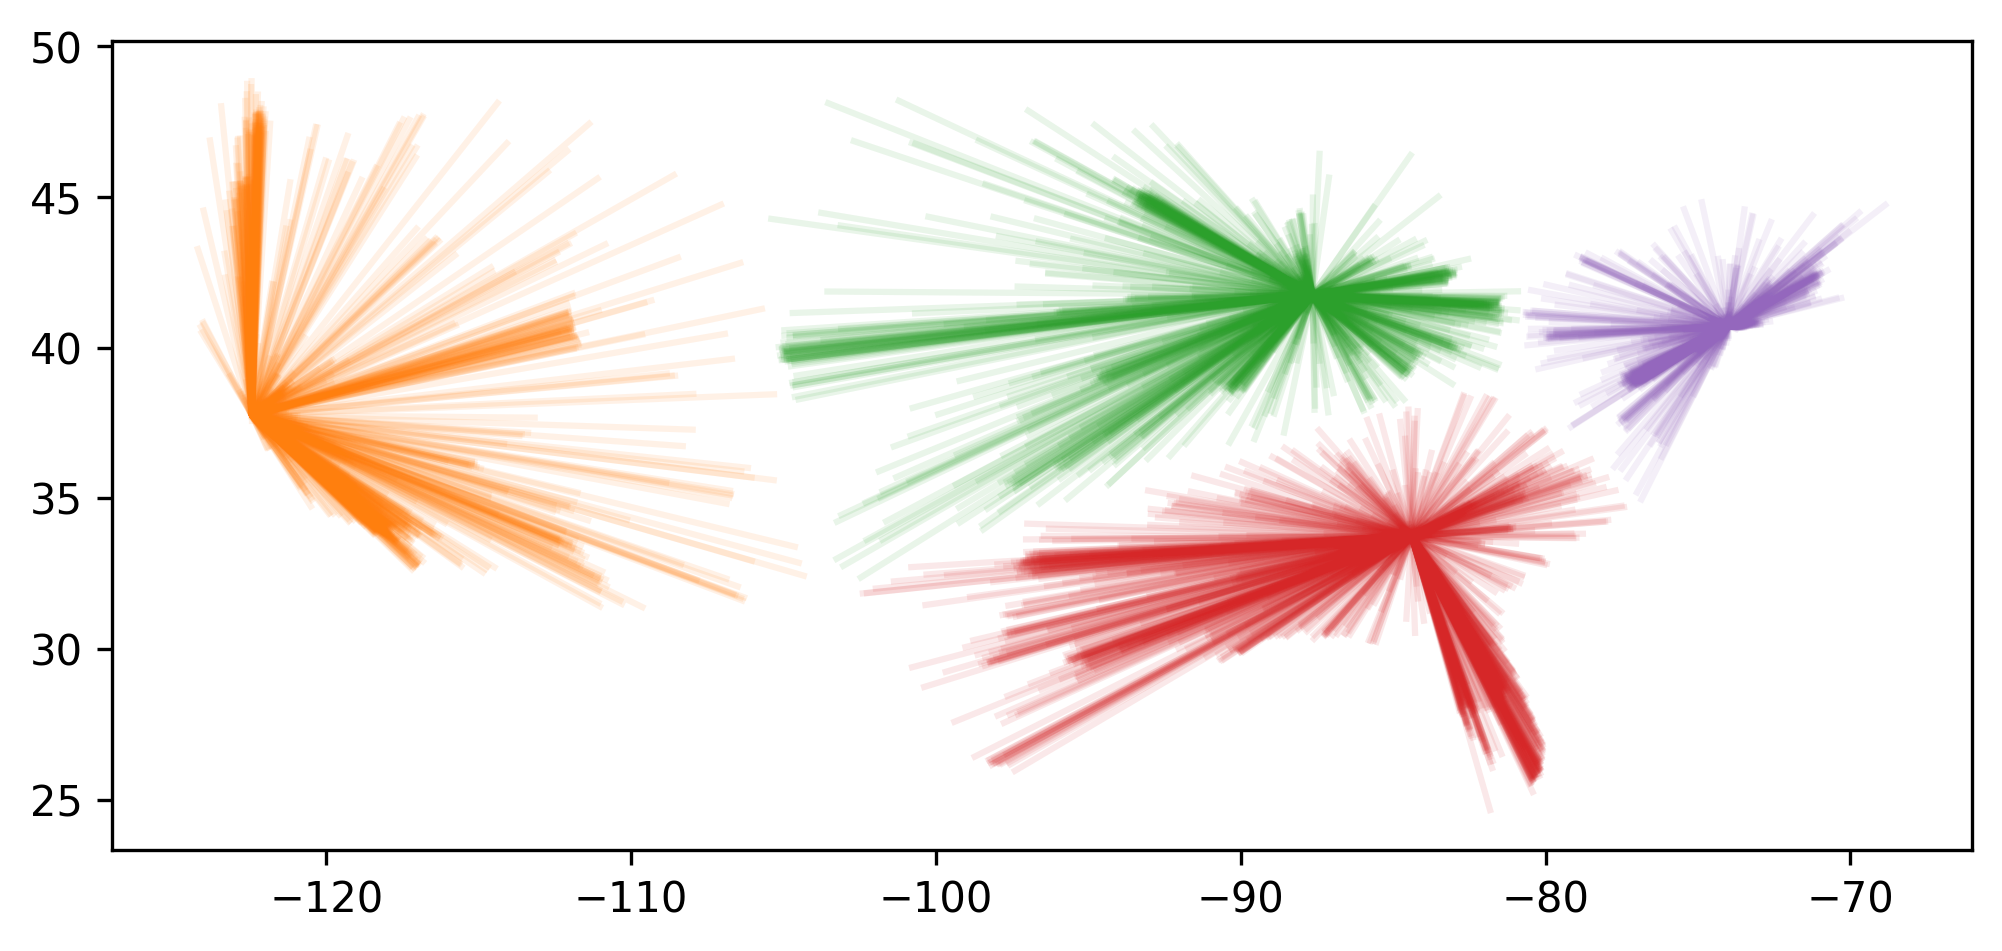

In [15]:
import matplotlib.pyplot as plt
from matplotlib import collections as mc
coords = []
# plot the line segments, indicent points, and base station points of the final network
fig, ax = plt.subplots(figsize=(8, 3.5), dpi=300)
unique_stations = assignment['facility no.'].unique()
for ust in range(len(unique_stations)):
    d1 = assignment.loc[assignment['facility no.'] == unique_stations[ust]].reset_index()
    new_list = []
    for r in range(d1.shape[0]):
        new_list.append([(d1.c_longitude[r], d1.c_latitude[r]), (d1.f_longitude[r], d1.f_latitude[r])])
    lc = mc.LineCollection(new_list, colors= f'C{ust + 1}', alpha=.1)  # alpha = (ust/len(unique_stations)), colors=ust,
    ax.add_collection(lc)
    ax.autoscale()
    #plt.axis('off')
plt.show()
fig.savefig('Outputs/network2.png') # , transparent=True

In [16]:
new_list

[[(-73.0689, 41.3442), (-74.0101, 40.7106)],
 [(-73.199, 41.1936), (-74.0101, 40.7106)],
 [(-72.9407, 41.6812), (-74.0101, 40.7106)],
 [(-73.471, 41.4016), (-74.0101, 40.7106)],
 [(-73.4826, 41.081), (-74.0101, 40.7106)],
 [(-73.0834, 41.3268), (-74.0101, 40.7106)],
 [(-72.6152, 41.7634), (-74.0101, 40.7106)],
 [(-72.8705, 41.2784), (-74.0101, 40.7106)],
 [(-73.6378, 41.0631), (-74.0101, 40.7106)],
 [(-72.6834, 41.7661), (-74.0101, 40.7106)],
 [(-72.5192, 41.7801), (-74.0101, 40.7106)],
 [(-72.7943, 41.5367), (-74.0101, 40.7106)],
 [(-72.6519, 41.5355), (-74.0101, 40.7106)],
 [(-73.0818, 41.2337), (-74.0101, 40.7106)],
 [(-73.0519, 41.489), (-74.0101, 40.7106)],
 [(-72.7862, 41.6758), (-74.0101, 40.7106)],
 [(-72.9457, 41.3174), (-74.0101, 40.7106)],
 [(-72.7308, 41.687), (-74.0101, 40.7106)],
 [(-72.1082, 41.3555), (-74.0101, 40.7106)],
 [(-72.8571, 41.382), (-74.0101, 40.7106)],
 [(-73.4067, 41.1128), (-74.0101, 40.7106)],
 [(-72.0884, 41.5502), (-74.0101, 40.7106)],
 [(-73.0008, 41.

In [17]:
[(d1.c_longitude[r], d1.c_latitude[r]), (d1.f_longitude[r], d1.f_latitude[r])]

[(-77.0741, 38.7914), (-74.0101, 40.7106)]

## Model 2
Weiszfelf method

In [18]:
import numpy as np
#Take each of 5 warehouse lat and lon
warehouse_coord5=[]
for i in range (len(facility)):
   # print(i)
    lat = facility["latitude"][i]
    lon = facility["longitude"][i]
    warehouse_coord5.append([lon, lat])


points = [tuple(x) for x in warehouse_coord5]
lon=np.array([point[0] for point in  points])  # ++
lat=np.array([point[1] for point in  points])

max_error = 0.0000000001
ext_condition = True

In [19]:
input_data_model2 = warehouse_coord5, lon, lat

# Analysis

In [20]:
# decision to open or close warehouse
decision = []
for var in mdl.getVars():
    if "x" in var.varName:
        if var.xn > 0:
            decision.append("yes")
        else:
            decision.append("no")


decision_df = pd.DataFrame(decision, columns=["decisions"])
facility_close = pd.concat([facility, decision_df], axis=1)
# Close NY warehouse
facility_close.head()

NameError: name 'mdl' is not defined

## Resource optimization


In [ ]:
data_visualization.draw_open_close_facility(AllSt, facility, customer_df)

## Final Geographic map showing optimized allocation of facilities

In [ ]:
# will add soon